In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

# Load the data and explore

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df.shape

(1460, 81)

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Doing basic data exploration and cleaning

So we are going to check the columns see which one havin missing values etc. 

In [6]:
df.isna().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

**Since the columns PoolQC, MiscFeature, Alley, Fence, MasVnrType are mostly empty. Let's drop them**

In [7]:
df_house=df.drop(['PoolQC','MiscFeature','Alley','Fence','MasVnrType'],axis=1)

In [8]:
df_house.isna().sum().sort_values(ascending=False)

FireplaceQu     690
LotFrontage     259
GarageType       81
GarageYrBlt      81
GarageFinish     81
               ... 
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
MSSubClass        0
SalePrice         0
Length: 76, dtype: int64

Rest of the columns have missing values less than 50%. So we will not drop those columns

In [9]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

**The Id column is just an identification so we can drop that as well**

In [10]:
df_house=df_house.drop('Id',axis=1)

In [11]:
df_house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [12]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [13]:
df_house.shape

(1460, 75)

## Understanding the data

In [14]:
house_numeric = df_house.select_dtypes(include=['float64', 'int64'])
house_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


**Let's get the correlation of the numeric values**

In [15]:
cor = house_numeric.corr()
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


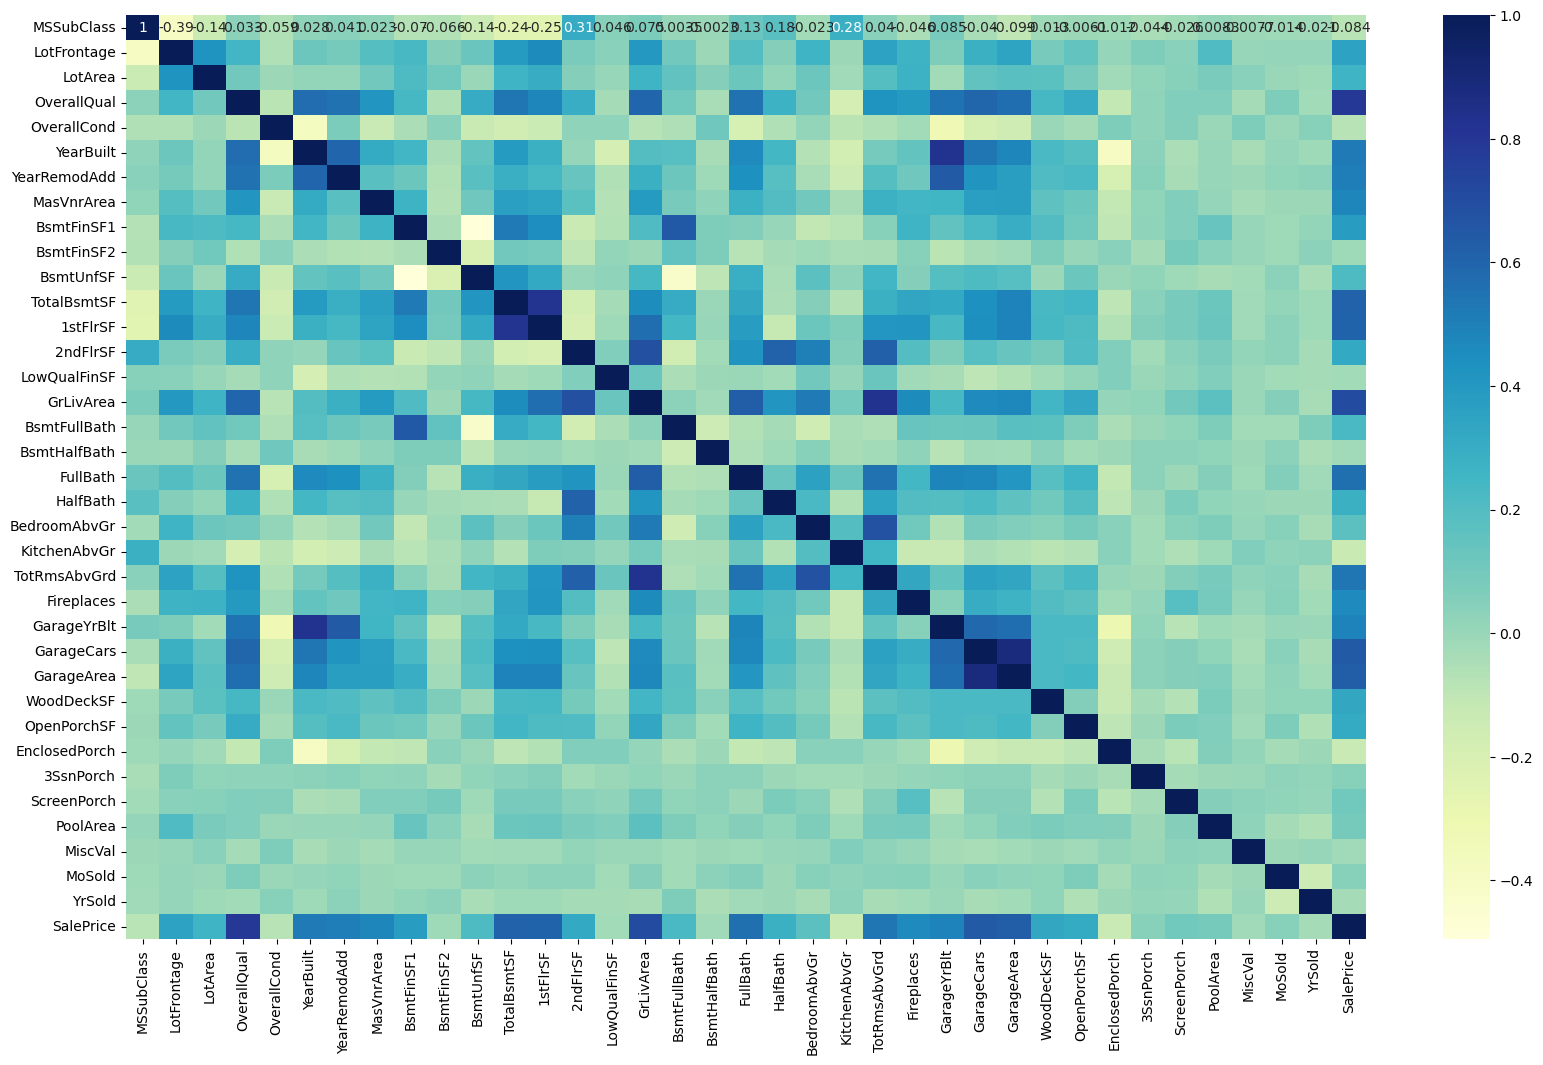

In [16]:
# figure size
plt.figure(figsize=(20,12))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

From the correlation matrix we can see that the following columns have good corelation with Sales Price
- Overall Quality (OverallQual)
- Living Area (GrLivArea)
- Year Built (YearBuilt)
- Total Basement Square Feet (TotalBsmtSF) 
- First Floor square feet (1stFlrSF)
- Full bathrooms above grade (FullBath)
- Total rooms above grade (TotRmsAbvGrd)
- Size of garage in car capacity (GarageCars)
- Size of garage in square feet (GarageArea)

# Data Cleaning

We also have few columns identified as int but should be categorical. So let's convert them to categorical values

In [17]:
for c in ['MSSubClass','OverallQual','OverallCond']:
    df_house[c] = df_house[c].astype('object')

df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   object 
 16  OverallCond    1460 non-null   object 
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

# Add values to columns with missing values

Let's see all the missing values
We would do the following 
- for categorical value => Add appropriate value from data dictionary
- for numeric value => Add median value

In [18]:
df_house.isna().sum().sort_values(ascending=False)

FireplaceQu     690
LotFrontage     259
GarageYrBlt      81
GarageType       81
GarageFinish     81
               ... 
TotalBsmtSF       0
Heating           0
MSZoning          0
CentralAir        0
SalePrice         0
Length: 75, dtype: int64

In [19]:
df_house.FireplaceQu = df_house.FireplaceQu.fillna('NA')

In [20]:
df_house.isna().sum().sort_values(ascending=False)

LotFrontage     259
GarageYrBlt      81
GarageCond       81
GarageType       81
GarageFinish     81
               ... 
TotalBsmtSF       0
Heating           0
MSZoning          0
CentralAir        0
SalePrice         0
Length: 75, dtype: int64

Lets start looking at the other columns and fill them with median values

In [21]:
 df_house.LotFrontage = df_house.LotFrontage.fillna(df_house.LotFrontage.median())

In [22]:
df_house.GarageYrBlt.value_counts()

GarageYrBlt
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: count, Length: 97, dtype: int64

In [23]:
df_house.GarageYrBlt.median()

1980.0

In [24]:
 df_house.GarageYrBlt = df_house.GarageYrBlt.fillna(df_house.GarageYrBlt.median())

In [25]:
df_house.GarageCond.value_counts()

GarageCond
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64

for empty fields let's put NA

In [26]:
 df_house.GarageCond = df_house.GarageCond.fillna('NA')

In [27]:
df_house.GarageType.value_counts()

GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

In [28]:
 df_house.GarageType = df_house.GarageType.fillna('NA')

In [29]:
df_house.GarageFinish.value_counts()

GarageFinish
Unf    605
RFn    422
Fin    352
Name: count, dtype: int64

In [30]:
 df_house.GarageFinish = df_house.GarageFinish.fillna('NA')

**Let's check the columns again to find any other missing value columns**

In [31]:
df_house.isna().sum().sort_values(ascending=False)

GarageQual      81
BsmtExposure    38
BsmtFinType2    38
BsmtQual        37
BsmtCond        37
                ..
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
MSZoning         0
SalePrice        0
Length: 75, dtype: int64

In [32]:
df_house.GarageQual.value_counts()

GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

In [33]:
 df_house.GarageQual = df_house.GarageQual.fillna('NA')

In [34]:
df_house.BsmtExposure.value_counts()

BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64

In [35]:
 df_house.BsmtExposure = df_house.BsmtExposure.fillna('NA')

In [36]:
df_house.BsmtFinType2.value_counts()

BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64

In [37]:
 df_house.BsmtFinType2 = df_house.BsmtFinType2.fillna('NA')

In [38]:
df_house.BsmtQual.value_counts()

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

In [39]:
 df_house.BsmtQual = df_house.BsmtQual.fillna('NA')

In [40]:
df_house.BsmtCond.value_counts()

BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: count, dtype: int64

In [41]:
 df_house.BsmtCond = df_house.BsmtCond.fillna('NA')

**Again look for missing values**

In [42]:
df_house.isna().sum().sort_values(ascending=False)

BsmtFinType1    37
MasVnrArea       8
Electrical       1
MSSubClass       0
KitchenAbvGr     0
                ..
ExterCond        0
ExterQual        0
Exterior2nd      0
Exterior1st      0
SalePrice        0
Length: 75, dtype: int64

In [43]:
df_house.BsmtFinType1.value_counts()

BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: count, dtype: int64

In [44]:
 df_house.BsmtFinType1 = df_house.BsmtFinType1.fillna('NA')

In [45]:
df_house.MasVnrArea.value_counts()

MasVnrArea
0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: count, Length: 327, dtype: int64

In [46]:
 df_house.MasVnrArea = df_house.MasVnrArea.fillna(df_house.MasVnrArea.median())

In [47]:
df_house.Electrical.value_counts()

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

Lets fill with median value

In [48]:
 df_house.Electrical = df_house.BsmtFinType1.fillna('SBrkr')

**Once more check if there is any more missing values**

In [49]:
df_house.isna().sum().sort_values(ascending=False)

MSSubClass     0
GarageYrBlt    0
FireplaceQu    0
Fireplaces     0
Functional     0
              ..
ExterQual      0
MasVnrArea     0
Exterior2nd    0
Exterior1st    0
SalePrice      0
Length: 75, dtype: int64

Since no columns have missing values let's prepare the data for model building

# Data Preparation

In [50]:
cols = list(df_house.columns)

In [51]:
Y_col=cols.pop()
Y_col

'SalePrice'

In [52]:
X_cols=cols
X_cols

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch'

In [53]:
y = df_house[Y_col]
X = df_house[X_cols]

Add dummy variables for categorical variables

In [54]:
house_categorical = X.select_dtypes(include=['object'])
house_categorical.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Gd,Typ,NA,Attchd,RFn,TA,TA,Y,WD,Normal
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [55]:
house_dummies = pd.get_dummies(house_categorical, drop_first=True,dtype='int')
house_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [56]:
X = X.drop(list(house_categorical.columns), axis=1)

In [57]:
X = pd.concat([X, house_dummies], axis=1)

In [58]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=273)

**Train and Test split**

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

# Model Building & Evolution

### Linear Regression
we start with linear regression to try to predict the price using simple linear regression

In [60]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

Intercept

In [61]:
lm.intercept_

1599163134045.2485

Coefficient of values

In [62]:
lm.coef_

array([ 1.80460344e+03,  6.80858222e+03,  1.36088126e+04,  1.88878177e+03,
        2.34807889e+03,  1.92952509e+16,  6.82461933e+15,  1.86932021e+16,
       -1.85594491e+16, -1.27892866e+15, -1.44414495e+15, -1.60857281e+14,
        1.73842018e+15,  8.81923900e+02, -6.68546022e+01,  9.21147820e+02,
       -1.69315285e+03, -1.62648334e+03, -3.57809988e+03, -1.42196638e+03,
        1.31922413e+03,  9.87446916e+02,  2.79354906e+03,  2.37936220e+03,
        5.91549810e+02,  1.64899875e+03,  5.46843545e+02,  1.10500314e+03,
        1.30796436e+03,  3.69773943e+03,  5.51455008e+02, -7.79692761e+02,
       -2.73432670e+02,  8.48000000e+02,  3.80843750e+02, -5.81125000e+02,
       -7.22625000e+02,  1.90775000e+03,  1.06393750e+03, -2.96512500e+03,
       -9.19125000e+02, -1.12825000e+03,  3.51022805e+15,  8.10000000e+01,
        4.08375000e+02, -3.60000000e+01,  5.86697699e+15,  7.46600000e+03,
        4.29300000e+03,  1.63893750e+04,  1.27262500e+04,  1.52650000e+03,
        4.05250000e+02,  

In [63]:
from sklearn.metrics import r2_score, mean_squared_error

In [64]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9570325638443864
-3.419108243887372e+21
274162268294.73145
9.637483249669414e+33
268523279.4267693
2.2003386414770353e+31


We see that the values for both test and train set is massively different. So this means the model is overfitting. Let's see if lasso and ridge regularization can fix it or not

# Ridge and Lasso Regression

Let's now try predicting house prices, using ridge and lasso regression

## Ridge Regression

In [65]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [66]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

Printing the best hyper parameter

In [67]:
print(model_cv.best_params_)

{'alpha': 500}


Now let's use alpha 500 and see how the model performs

In [68]:
alpha = 500
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 2.52517276e+02  2.73743436e+03  1.92980230e+03  3.03577214e+03
  3.15049962e+03  1.94260093e+03  9.35376935e+02  1.02394072e+03
  3.39489035e+03  5.22466293e+03  4.63368531e+03 -5.33278812e+02
  7.64366567e+03  2.18305664e+03  1.67235558e+02  4.17303660e+03
  1.91275070e+03  6.19761753e+02 -1.76941050e+03  3.89873234e+03
  2.70656964e+03  8.84682713e+02  4.37206547e+03  2.97335022e+03
  1.56586720e+03  9.49459413e+02  1.94145834e+02  1.10019476e+03
  1.26373129e+03 -2.37849662e+02  1.39314698e+02 -2.52594514e+02
 -4.43742950e+02 -9.45213558e+02  1.20771744e+02  5.45314644e+01
  3.15859428e+02  4.73438913e+02  8.61189709e+02  3.21223545e+02
 -8.37418777e+02 -2.99258612e+02 -8.52969622e+02 -1.57796922e+03
 -1.37992781e+03 -6.85015150e+02 -9.69780690e+02  6.98519210e+02
  3.11092467e+02  1.15591562e+03 -7.39265624e+02  7.05017222e+02
  4.61503946e+02 -1.96237697e+03 -4.25412259e+02  1.05308015e+03
  5.77719607e+02  1.57015089e+03 -8.94163492e+02  1.96830872e+03
 -1.13010848e+03 -3.04373

**Lets calculate some metrics such as R2 score, RSS and RMSE. This will give us an idea about how the model performed**

In [69]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8936101878197337
0.861787498514367
678841346855.216
389581309788.61584
664878890.1618178
889455045.1794882


We see that the **r square score** for both **test and train** are pretty close too. **86% and 89%** respectively

Now let's see if Lasso can do better

## Lasso Regression

In [70]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

Let's print the best param for Lasso

In [71]:
print(model_cv.best_params_)

{'alpha': 500}


For Lasso also alpha is 500. so now let's run the model with alpha of 500 and see the result

In [72]:
alpha =500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=500)

In [73]:
lasso.coef_

array([-0.00000000e+00,  4.02130259e+03,  8.69559119e+03,  3.71313855e+03,
        1.35728077e+03,  2.44134719e+03,  5.87237805e+01, -0.00000000e+00,
        4.08273368e+03,  0.00000000e+00,  0.00000000e+00, -2.02766408e+03,
        3.01913096e+04,  2.90102010e+03,  0.00000000e+00,  2.20404132e+03,
        0.00000000e+00, -5.54790173e+02, -4.49649005e+03,  0.00000000e+00,
        2.32938262e+02,  0.00000000e+00,  5.82708953e+03,  0.00000000e+00,
        3.21550708e+02,  2.46863955e+02,  0.00000000e+00,  8.40972933e+02,
        1.11171393e+03, -0.00000000e+00,  0.00000000e+00, -1.17092823e+02,
       -0.00000000e+00, -0.00000000e+00,  3.55614561e+01,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -4.55328804e+02, -0.00000000e+00,
       -4.46157041e+02, -0.00000000e+00, -8.09069210e+02,  0.00000000e+00,
        5.50001449e+01,  1.21115637e+03, -0.00000000e+00,  9.00081530e+02,
        1.51943848e+02, -

**Let's now calculate the various metrics line r square, RSS and RMSE value and see how it performed**

In [74]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9325209371947997
0.8459779397648239
430563575030.97955
434143911135.2623
421707713.056787
991196144.1444346


We see that the **r square score** for both **test and train** are not so close. **84% and 93%** respectively. So this means there is an overfit for Lasso model

Now to better compare the values. Let's put them in table

### Metrix Table

In [75]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.570326e-01,8.936102e-01,9.325209e-01
1,R2 Score (Test),-3.419108e+21,8.617875e-01,8.459779e-01
2,RSS (Train),2.741623e+11,6.788413e+11,4.305636e+11
3,RSS (Test),9.637483e+33,3.895813e+11,4.341439e+11
4,MSE (Train),1.638668e+04,2.578525e+04,2.053552e+04
5,MSE (Test),4.690777e+15,2.982373e+04,3.148327e+04


### Ridge and Lasso coefficients

Now let's print the coeffeients for both lasso and ridge

In [76]:
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas.sort_values(by=['Ridge','Lasso'],ascending=False)

,Ridge,Lasso
GrLivArea,7643.665667,30191.309615
OverallQual_10,7120.076658,12568.165453
OverallQual_9,6895.192201,12375.309054
Neighborhood_NoRidge,5578.578832,5033.186571
1stFlrSF,5224.662931,0.000000
RoofMatl_WdShngl,4903.347919,22455.724168
2ndFlrSF,4633.685308,0.000000
Neighborhood_NridgHt,4446.175527,3855.071290
GarageCars,4372.065469,5827.089533
OverallQual_8,4214.385118,9704.752394


# Summary

- We should choose Ridge over Lasso as Lasso is doing overfitting of the data and Ridge is not overfitting
- Here are some of the variables that effects the value of the property positively
    - **Above grade (ground) living area square feet**
    - **OverallQual:** Rates the overall material and finish of the house - any value from 8 (Very Good) increases the price. But for Quality anything from 7 affects the price negatively
    - For **Neighborhood** that gives higher to lower price effects are Northridge, Northridge Heights, Crawford, Stone Brook, Somerset and Veenker. Also,the price of the property is negatively effected if the neighborhood is in Edwards, North Ames, Mitchell, Meadow Village, Gilbert, Old Town,
    - **First Floor** square feet 
    - **Second floor** square feet
    - **Roof material** - The price positively affects if the materials are Wood Shingles, Standard (Composite) Shingle, Other materials does not add much value
    - **Size of garage in car capacity**
    - **Size of garage in square feet**
    - **Full bathrooms** above grade
    - **Total rooms** above grade (does not include bathrooms)
    - Good **Basement exposure** increases the price but for any other cases like Minimum, No exposure or if No basement available then the price is negatively effected. 
    - Total square feet of **basement area**
    - **Masonry veneer area** in square feet
    - **Remodel date**
    - **Lot size** in square feet
    - **Number of fireplaces**
    - **Basement full bathrooms**
- Some of the paramerers that negatively affects the value of the property are as follows
    - The **property is near** positive off-site feature--park, greenbelt, etc.
    - The **height of the basement** less than 100 inches 
    - The **quality of the material on the exterior** is typical or less. 
    - **Kitchen quality** is not excellent (Good, Typical,Fair etc)
    - The **quality of the material on the exterior** is Typical or less
    - **Fireplace quality** is fair, poor avarage or no fireplace available
    - General **shape of property** is irregular

# Assignment Answers

### 1: Double the Alpha of both Ridge and Lasso 

#### Ridge

In [77]:
alpha = 1000
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=1000)

**Get R2 and other scores**

In [78]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
metric2.append(mse_test_lr**0.5)

#### Lasso

In [79]:
alpha =1000
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=1000)

In [80]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
metric3.append(mse_test_lr**0.5)

#### Metrices table for alpha 1000

In [81]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.570326e-01,8.706729e-01,8.989779e-01
1,R2 Score (Test),-3.419108e+21,8.504647e-01,8.410127e-01
2,RSS (Train),2.741623e+11,8.251976e+11,6.445917e+11
3,RSS (Test),9.637483e+33,4.214969e+11,4.481394e+11
4,MSE (Train),1.638668e+04,2.842930e+04,2.512636e+04
5,MSE (Test),4.690777e+15,3.102131e+04,3.198670e+04


#### Coefficients for Ridge and Lasso

In [82]:
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas.sort_values(by=['Ridge','Lasso'],ascending=False)

,Ridge,Lasso
GrLivArea,6334.415528,28457.984823
OverallQual_10,5734.984339,12400.375791
OverallQual_9,5520.593989,13729.427405
Neighborhood_NoRidge,4774.068542,5346.859707
1stFlrSF,4710.580698,0.000000
Neighborhood_NridgHt,3944.704554,4648.986633
TotRmsAbvGrd,3816.280427,0.000000
GarageCars,3788.906024,7468.617492
RoofMatl_WdShngl,3689.000429,5279.009616
FullBath,3565.549973,2422.079894


### 3: Remove the 5 top params and check how Lasso works 

Let's first determine the top 5 params for lasso by sorting the values

In [84]:
betas.sort_values(by='Lasso',ascending=False).head(5)

,Ridge,Lasso
GrLivArea,6334.415528,28457.984823
OverallQual_9,5520.593989,13729.427405
OverallQual_10,5734.984339,12400.375791
OverallQual_8,3553.157199,10409.492578
GarageCars,3788.906024,7468.617492


So the columns to drop are **GrLivArea, OverallQual_9, OverallQual_10, OverallQual_8, GarageCars**

In [85]:
X_train1= X_train.drop(['GrLivArea', 'OverallQual_9', 'OverallQual_10', 'OverallQual_8', 'GarageCars'],axis=1)
X_test1= X_test.drop(['GrLivArea', 'OverallQual_9', 'OverallQual_10', 'OverallQual_8', 'GarageCars'],axis=1)

#### Again train the model using Lasso

In [89]:
lasso1 = Lasso()

# cross validation
model_cv1 = GridSearchCV(estimator = lasso1, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv1.fit(X_train1, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

so the best param now is 

In [90]:
model_cv1.best_params_

{'alpha': 500}

So for **Alpha 500** let's find the params

In [91]:
alpha =500
lasso1 = Lasso(alpha=alpha)
lasso1.fit(X_train1, y_train)

Lasso(alpha=500)

#### Find the Scores for Lasso

In [92]:
y_pred_train1 = lasso1.predict(X_train1)
y_pred_test1 = lasso1.predict(X_test1)

r2_train_lr1 = r2_score(y_train, y_pred_train1)
print(r2_train_lr1)

r2_test_lr1 = r2_score(y_test, y_pred_test1)
print(r2_test_lr1)

rss1_lr1 = np.sum(np.square(y_train - y_pred_train1))
print(rss1_lr1)

rss2_lr1 = np.sum(np.square(y_test - y_pred_test1))
print(rss2_lr1)

mse_train_lr1 = mean_squared_error(y_train, y_pred_train1)
print(mse_train_lr1)

mse_test_lr1 = mean_squared_error(y_test, y_pred_test1)
print(mse_test_lr1)

0.9248039388805587
0.8397133060483579
479803416910.22363
451802112689.9203
469934786.39590955
1031511672.8080372


#### Let's have a look at the coefficients

In [93]:
betas1 = pd.DataFrame(index=X_train1.columns)
betas1.rows = X_train1.columns
betas1['Lasso'] = lasso1.coef_
pd.set_option('display.max_rows', None)
betas1.sort_values(by='Lasso',ascending=False)

,Lasso
RoofMatl_CompShg,37645.929659
2ndFlrSF,26406.809825
RoofMatl_Tar&Grv,23356.445228
RoofMatl_WdShngl,23152.928818
1stFlrSF,21323.980946
RoofMatl_WdShake,16074.079653
YearBuilt,8969.917011
RoofMatl_Membran,8073.439461
TotalBsmtSF,7990.752466
RoofMatl_Metal,7390.527806
